#### Langchain v1


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

print("MODEL =", os.environ.get("OLLAMA_MODEL"))
print("BASE  =", os.environ.get("OLLAMA_BASE_URL"))


MODEL = qwen2.5:7b
BASE  = http://localhost:11434


In [ ]:

from dotenv import load_dotenv
import os

load_dotenv()


True

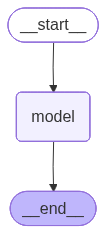

In [4]:
from langchain.agents import create_agent
from langchain_ollama import ChatOllama
import os
from dotenv import load_dotenv

load_dotenv()

ollama_model = ChatOllama(model=os.environ["OLLAMA_MODEL"])

agent = create_agent(
    model=ollama_model,
    tools=[],
    system_prompt="You are a helpful assistant"
)

agent


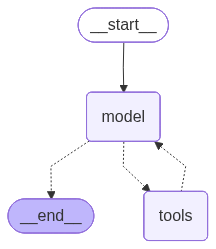

In [ ]:
from langchain.agents import create_agent
from langchain_ollama import ChatOllama
import os
from dotenv import load_dotenv

load_dotenv()
def get_weather(city:str) -> str:
    """You return the weather of a city"""
    return f"{city} has a sunny weather"
ollama_model = ChatOllama(model=os.environ["OLLAMA_MODEL"])
agent = create_agent(
    model = ollama_model,
    tools = [get_weather],
    system_prompt = "You are an helpful assistant"
)
agent


In [14]:
response = agent.invoke({"messages":[{"role":"user","content":"What is the weather like in New York"}]})

In [15]:
response["messages"][-1].content

'The weather in New York is sunny.'

In [ ]:
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model

load_dotenv()

model = init_chat_model("google_genai:gemini-2.5-flash-lite")

response = model.invoke("Why do parrots talk?")
print(response.content)


Parrots talk for a fascinating combination of reasons, primarily driven by their **intelligence, social nature, and survival instincts.** It's not just a random mimicry of sounds; there's a purpose behind their vocalizations.

Here's a breakdown of the key reasons why parrots talk:

**1. Social Bonding and Communication:**

* **Flock Mentality:** Parrots are highly social creatures that live in flocks in the wild. Vocalizations are crucial for maintaining group cohesion, signaling danger, locating other members, and coordinating activities like foraging and roosting.
* **Establishing Dominance and Relationships:** Within a flock, different calls and vocalizations can signal social status, intentions, and build relationships between individuals.
* **"Call and Response":** This is a fundamental aspect of parrot communication. They often vocalize and then listen for a response, reinforcing their social bonds.

**2. Mimicry and Learning:**

* **Vocal Learners:** Parrots are among the few s

In [22]:
from langchain_google_genai import ChatGoogleGenerativeAI

models = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")
repon = models.invoke("hi")
repon.content

'Hello! How can I help you today?'

#### Streaming

In [28]:
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model
load_dotenv()
model = init_chat_model("google_genai:gemini-2.5-flash-lite")
for chunk in model.stream("Why is education important"):
    print(chunk.text, end = '|', flush=True)
response.content

Education is important| for a multitude of reasons, impacting individuals, societies, and the world as a whole. Here|'s a breakdown of its key contributions:

**For the Individual:**

* **Personal Growth and Development:**
    * **Knowledge and Understanding:** Education provides individuals with the knowledge and understanding of the world around them, from science and history to art| and literature. This broadens perspectives and fosters intellectual curiosity.
    * **Critical Thinking and Problem-Solving:** It equips individuals with the skills to analyze information, evaluate arguments, and develop creative solutions to challenges. This is essential for navigating a| complex world.
    * **Self-Discovery and Potential:** Education helps individuals identify their strengths, interests, and passions, allowing them to explore their potential and pursue fulfilling paths.
    * **Confidence and Self-Esteem:** Mastering| new skills and knowledge boosts confidence and self-esteem, empowe

'This is a profound question, and one that has been pondered by philosophers, theologians, artists, and individuals throughout history. There isn\'t a single, universal answer, as the reasons for living are deeply personal and can evolve over a lifetime. However, we can explore some common themes and perspectives that contribute to a meaningful life for a man.\n\nHere are some potential reasons why a man might choose to live, categorized for clarity:\n\n**1. Connection and Relationships:**\n\n*   **Love and Family:** The deep bonds of love with partners, children, parents, siblings, and friends can be incredibly motivating. The desire to protect, nurture, and share life with loved ones is a powerful driver.\n*   **Friendship and Camaraderie:** The support, laughter, shared experiences, and sense of belonging that come from friendships are invaluable.\n*   **Contribution to Community:** Being a part of something larger than oneself, whether it\'s a local community, a cause, or a group w

#### Batch

In [31]:
responses = model.batch([
    "what is the right thing in difficult situation",
    "What is the real term for el dorado",
    "Hello"],
    config={
        'max_concurrency': 5,
    })
for response in responses:
    print(response)

content='In difficult situations, the "right thing" is rarely a single, simple answer. It\'s a complex interplay of factors, values, and potential consequences. However, we can identify some guiding principles and approaches that help navigate towards the most ethical and beneficial outcome.\n\nHere\'s a breakdown of what constitutes the "right thing" in difficult situations:\n\n**1. Prioritize Core Values and Ethics:**\n\n*   **Integrity and Honesty:** Even when it\'s difficult, being truthful and acting with integrity is crucial. Deception, even with good intentions, can erode trust and create more problems.\n*   **Fairness and Justice:** Strive to treat everyone equitably and ensure that decisions are just, even if they don\'t benefit everyone equally.\n*   **Compassion and Empathy:** Try to understand the perspectives and feelings of others involved. This doesn\'t mean agreeing with them, but acknowledging their humanity.\n*   **Respect:** Treat all individuals with dignity, even t